# Bayesian Hello World!

In [1]:
from tfp_helper import evaluate
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

## Simulate Coin Toss

$$p = 0.75$$

In [2]:
p = 0.75
def simulate_coin_toss(p, n=100):
    bernoulli = tfd.Bernoulli(probs=p)
    obs = bernoulli.sample(n)
    return evaluate(obs)

In [3]:
obs = simulate_coin_toss(0.75, 100)

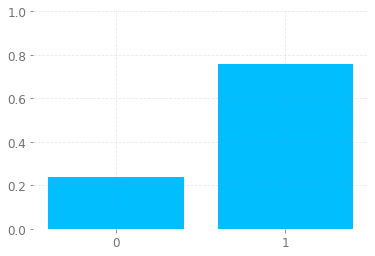

In [7]:
plot_obs(obs)
plt.savefig('images/coin_sim_plot.png')

## Plot Observations

In [5]:
def plot_obs(obs):
    ones = (obs == 1).sum()
    zeroes = (obs == 0).sum()
    plt.bar([0, 1], [zeroes/len(obs), ones/len(obs)])
    plt.ylim([0., 1.])
    plt.xticks([0, 1])

## Define joint_log_prob

In [8]:
def joint_log_prob(obs, p):
    var_p = tfd.Uniform(low=0., high=1.)
    var_obs = tfd.Bernoulli(probs=p)
    
    return (
        var_p.log_prob(p)
        + tf.reduce_sum(var_obs.log_prob(obs))
    )

## Run Inference

In [12]:
from tfp_helper import infer

trace = infer(joint_log_prob, obs,
              variables=['p'],
              initial_chain_state=[0.5],
              nsteps=20000, burn_in_ratio=0.5,
              bijectors={
                  'p' : tfp.bijectors.Sigmoid(),
              })

100%|██████████| 10/10 [00:13<00:00,  1.30s/it]


## Plot trace with arviz

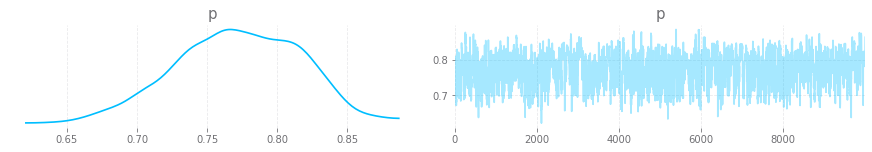

In [20]:
import arviz as az

az.plot_trace(trace);

## Plot histogram

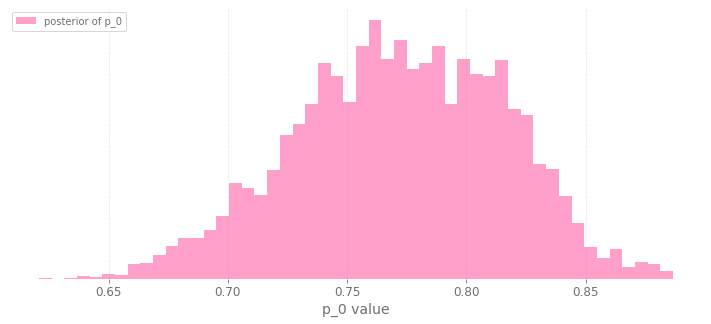

In [19]:
from tfp_helper import plot_posterior_hist

plot_posterior_hist(trace, 'p');